# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement.


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Dataset

There are 25 initial variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [94]:
### Needed libraries for Classification Modeling ###

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from sklearn.preprocessing import binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split




import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Suppress notebook warnings ###
import warnings
warnings.filterwarnings('ignore')

### Pandas settings to avoid exponential form and display all columns ###
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

## 1. Data Cleaning

### Initial data investigation 

In [95]:
### Load data ###
df = pd.read_csv('student_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2873,350000,1,1,2,37,-2,-2,-2,-2,-2,-2,316,316,316,466,466,316,316,316,466,466,316,316,0
1,3598,50000,2,2,1,37,2,2,2,0,0,0,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0
2,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,6874,20000,1,3,1,56,0,0,0,0,2,0,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0
4,6444,110000,2,2,2,32,0,0,0,0,0,0,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [96]:
### Check distribution of dependent variable ###
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

Based on initial investigation, there are more clients that will not default payment next month. Approximately **22%** of **23,999** clients will not default.

In [97]:
(18691 + 5308)

23999

In [98]:
### Check all columns ###
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [99]:
### Check data shape ###
df.shape

(23999, 25)

In [100]:
### Check columns with null values for potential cleaning ###
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values in the dataset.

In [101]:
### Check column data types ###
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [102]:
### Drop ID column because it is only a unique identified and not a predictor ###
df.drop(['ID'], inplace=True, axis =1)

### Education

This section checks if all corresponding values in Education column satisfy the criteria mentioned in the dataset variable description.

In [103]:
### Check unique Education column values ###
df['EDUCATION'].unique()

array([1, 2, 3, 5, 6, 4, 0])

In [104]:
### Check count per unique value ###
df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

Given that value 4 is Others while 5 and 6 are Unknown, we changed all 5 and 6 into Others.

In [105]:
### Replace all Unknown to Others ###
df['EDUCATION'].replace(5, 4, inplace=True)
df['EDUCATION'].replace(6, 4, inplace=True)
df['EDUCATION'].replace(0, 4, inplace=True)

df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
4      375
Name: EDUCATION, dtype: int64

### Marriage

This section checks if all corresponding values in Marriage column satisfy the criteria mentioned in the dataset variable description.

In [106]:
### Check unique Marriage column values ###
df['MARRIAGE'].unique()

array([2, 1, 3, 0])

In [107]:
### Check count per unique value ###
df['MARRIAGE'].value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

Based on the guidelines, there should only be three (3) variables for Marriage - 1, 2 and 3. Those with 0 as values can be safely bucketed into Others (3).

In [108]:
### Replace all Unknown to Others ###
df['MARRIAGE'].replace(0, 3, inplace=True)

df['MARRIAGE'].value_counts()

2    12735
1    10958
3      306
Name: MARRIAGE, dtype: int64

### Sex

In [109]:
df['SEX'].unique()

array([1, 2])

No cleaning required for this column as the values are either 1 or 2 satisfying the criteria.

### Pay_N

This section checks if all corresponding values in the multiple Pay_N columns satisfy the dataset variable descriptions.

In [110]:
### Check unique Pay_N column values ###
p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-2  2 -1  0  1  3  8  5  4  6  7] [-2  2 -1  0  3  1  4  7  8  6  5] [-2  2 -1  0  3  6  5  4  7  1  8] [-2  0 -1  2  3  5  4  7  6  1  8] [-2  0 -1  2  3  4  7  5  6  8] [-2  0 -1  2  3  4  7  6  5  8]


Based on the result above, the following values are not in the variable guidelines: -2 and 0. -1 means the the bill is duly paid so -2 and 0 do not make sense. -2 and 0 likely mean that the corresponding bills are also paid thus, they can be replaced with -1 value defined as "pay duly".

In [111]:
### Replace all -2 and 0 into -1 ###
df['PAY_0'].replace(-2, -1, inplace=True)
df['PAY_0'].replace(0, -1, inplace=True)
df['PAY_2'].replace(-2, -1, inplace=True)
df['PAY_2'].replace(0, -1, inplace=True)
df['PAY_3'].replace(-2, -1, inplace=True)
df['PAY_3'].replace(0, -1, inplace=True)
df['PAY_4'].replace(-2, -1, inplace=True)
df['PAY_4'].replace(0, -1, inplace=True)
df['PAY_5'].replace(-2, -1, inplace=True)
df['PAY_5'].replace(0, -1, inplace=True)
df['PAY_6'].replace(-2, -1, inplace=True)
df['PAY_6'].replace(0, -1, inplace=True)

p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-1  2  1  3  8  5  4  6  7] [-1  2  3  1  4  7  8  6  5] [-1  2  3  6  5  4  7  1  8] [-1  2  3  5  4  7  6  1  8] [-1  2  3  4  7  5  6  8] [-1  2  3  4  7  6  5  8]


## 2. EDA

### Correlation

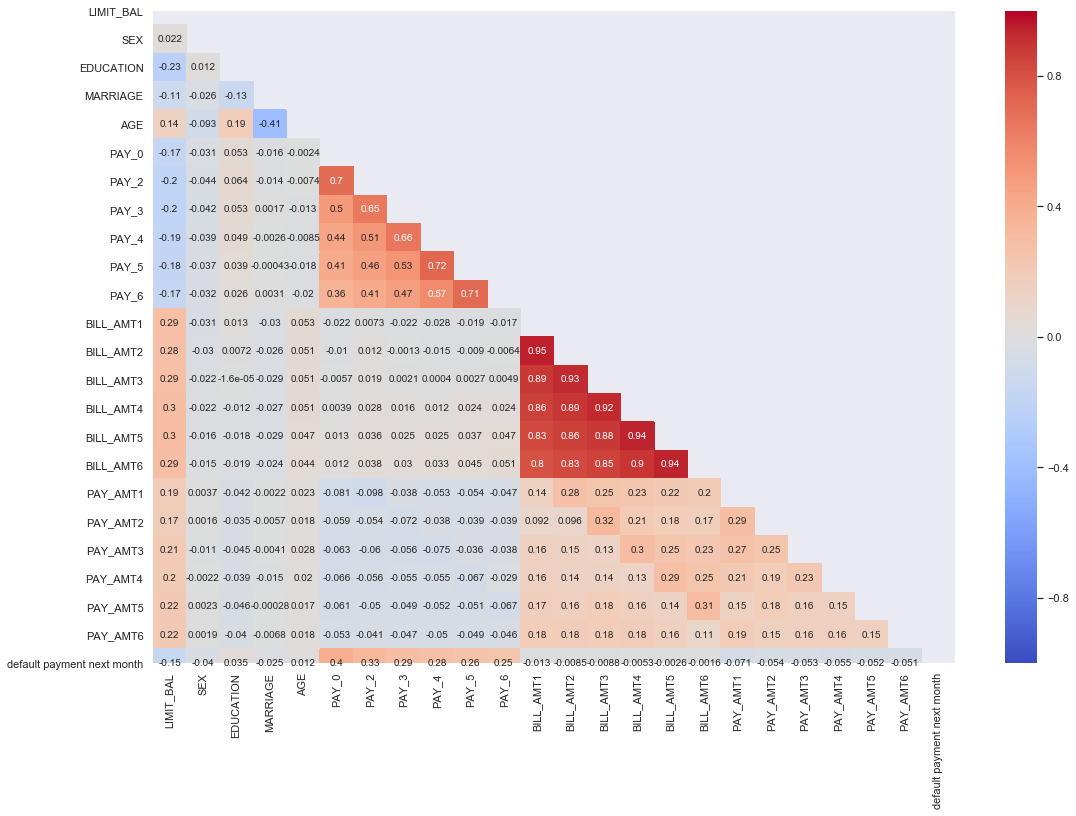

In [112]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

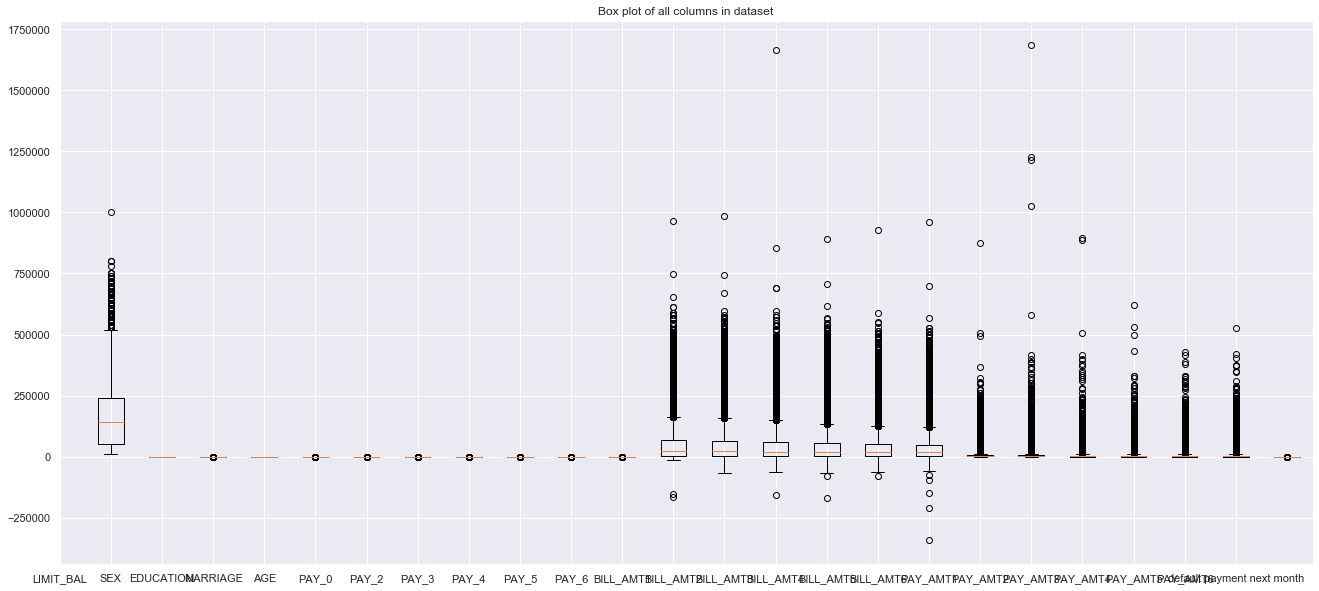

In [113]:
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

### Dependent Variable - Will default next month or not?

In [114]:
default_df = pd.DataFrame(df['default payment next month'].value_counts())
default_df.reset_index(inplace = True)
default_df.columns = ['Status', 'Count']
default_df

,Status,Count
0,0,18691
1,1,5308


In [115]:
default_df['Status'].replace(0, "Will not default", inplace=True)
default_df['Status'].replace(1, "Will default", inplace=True)

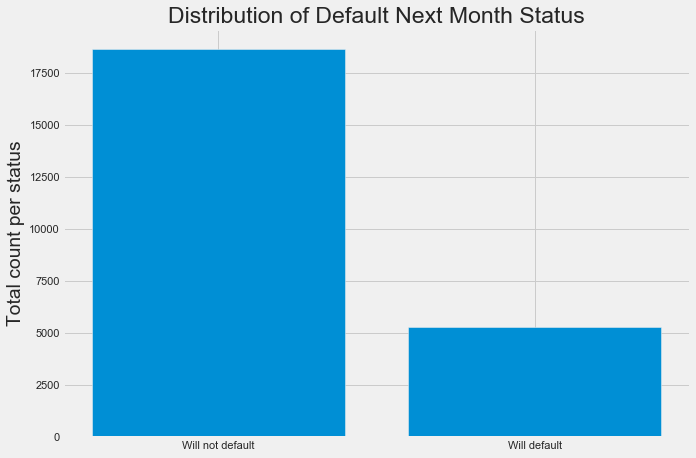

In [116]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(default_df["Status"],default_df["Count"])

ax.set_ylabel("Total count per status")
ax.set_title('Distribution of Default Next Month Status')

plt.show()

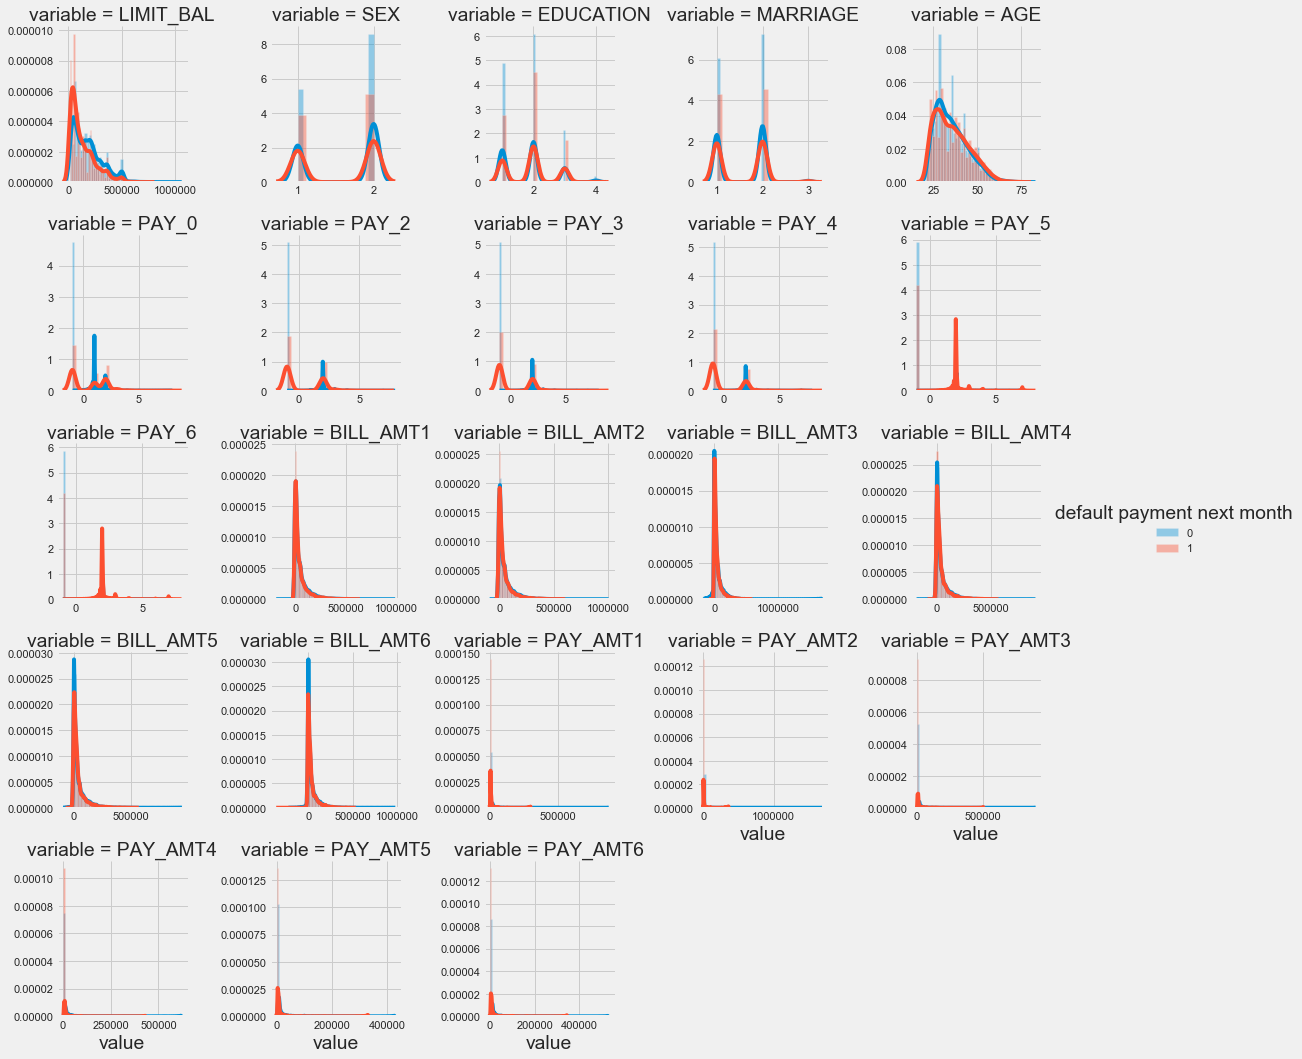

In [117]:
output = 'default payment next month'

cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

## Features versus Target

### Limit Balance

In [118]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000
mean,167825.729,1.604,1.846,1.556,35.523,-0.417,-0.535,-0.555,-0.624,-0.678,-0.670,51589.035,49521.698,47474.826,43796.590,40748.049,39226.852,5687.720,6019.571,5253.323,4824.491,4825.034,5245.643,0.221
std,129915.116,0.489,0.746,0.522,9.254,1.142,1.142,1.124,1.069,1.004,1.009,74104.133,71551.215,70010.815,64927.450,61257.538,60075.537,16698.507,24541.363,17967.029,15730.754,15596.580,17795.775,0.415
min,10000.000,1.000,1.000,1.000,21.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-165580.000,-67526.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3577.500,2958.000,2718.000,2392.500,1801.000,1280.000,1000.000,858.500,395.000,300.000,269.500,125.000,0.000
50%,140000.000,2.000,2.000,2.000,34.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,22472.000,21290.000,20223.000,19145.000,18227.000,17175.000,2110.000,2012.000,1809.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,42.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,67767.000,64635.500,60962.000,55418.000,50581.000,49434.500,5020.000,5000.000,4561.000,4089.000,4029.500,4008.000,0.000
max,1000000.000,2.000,4.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [119]:
bins = [0, 200000, 400000, 600000, 800000, 1000000]
labels = [200000, 400000, 600000, 800000, 1000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

In [120]:
limit_df = df.groupby(['binned', 'default payment next month']).size().unstack(1)
limit_df.reset_index(inplace = True)
limit_df.columns = ['Limit Balance', 'Will not default', 'Will default']
limit_df

,Limit Balance,Will not default,Will default
0,200000,12117.000,4165.000
1,400000,5299.000,968.000
2,600000,1213.000,170.000
3,800000,61.000,5.000
4,1000000,1.000,nan


In [121]:
limit_df["percent"] = limit_df["Will default"] / (limit_df["Will not default"] + limit_df["Will default"])
limit_df

,Limit Balance,Will not default,Will default,percent
0,200000,12117.000,4165.000,0.256
1,400000,5299.000,968.000,0.154
2,600000,1213.000,170.000,0.123
3,800000,61.000,5.000,0.076
4,1000000,1.000,nan,nan


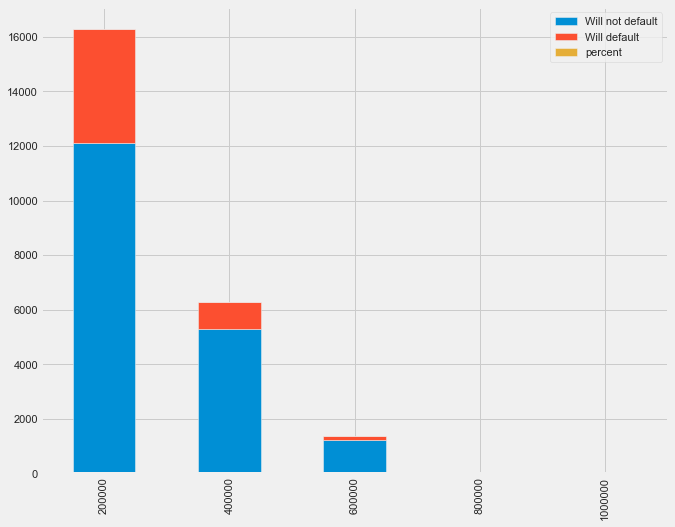

In [122]:
limit_df.index = [200000, 400000, 600000, 800000, 1000000]
limit_df.plot(kind='bar',stacked=True, figsize=(10,8))

As seen in the table summary and visualized in the graph above, the percentage of those that will default are decreasing as the credit limit is increasing.

### Sex

In [123]:
sex_df = df.groupby(['SEX', 'default payment next month']).size().unstack(1)
sex_df.reset_index(inplace = True)
sex_df.columns = ['Gender', 'Will not default', 'Will default']
sex_df["percent"] = sex_df["Will default"] / (sex_df["Will not default"] + sex_df["Will default"])

sex_df

,Gender,Will not default,Will default,percent
0,1,7215,2298,0.242
1,2,11476,3010,0.208


In [124]:
del sex_df['Gender']
del sex_df['percent']

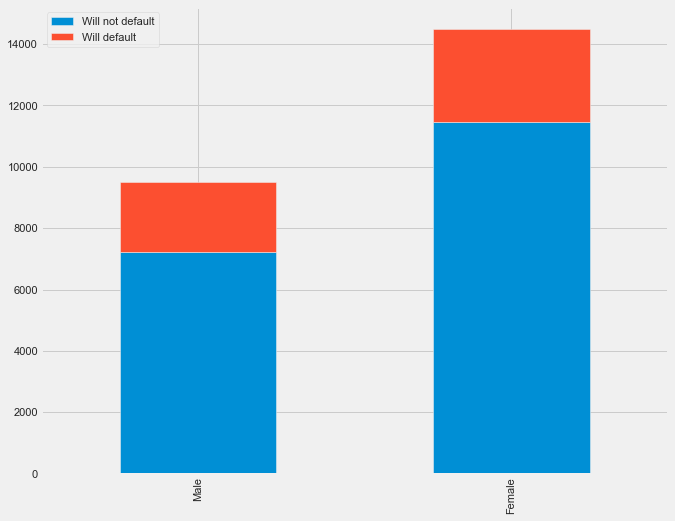

In [125]:
sex_df.index = ['Male', 'Female']
sex_df.plot(kind='bar',stacked=True, figsize=(10,8))

It is 4% more like for a Male to default than a female.

### Education

In [126]:
educ_df = df.groupby(['EDUCATION', 'default payment next month']).size().unstack(1)
educ_df.reset_index(inplace = True)
educ_df.columns = ['EDUCATION', 'Will not default', 'Will default']
educ_df["percent"] = educ_df["Will default"] / (educ_df["Will not default"] + educ_df["Will default"])

educ_df

,EDUCATION,Will not default,Will default,percent
0,1,6826,1616,0.191
1,2,8532,2656,0.237
2,3,2982,1012,0.253
3,4,351,24,0.064


In [127]:
del educ_df['EDUCATION']
del educ_df['percent']

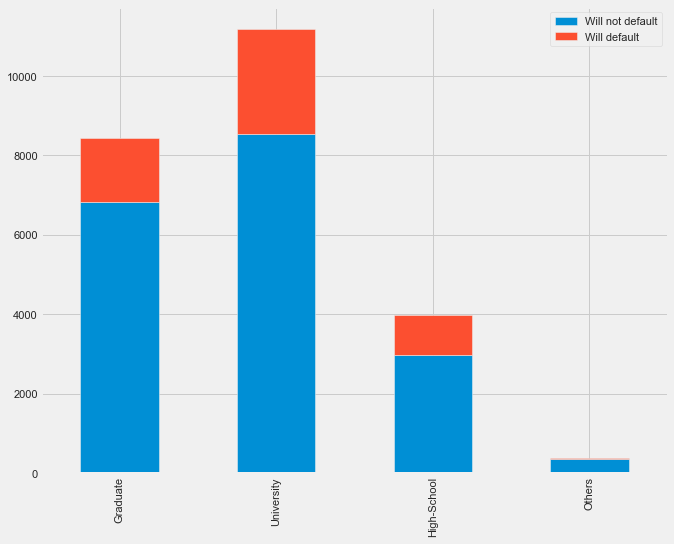

In [128]:
educ_df.index = ['Graduate', 'University', 'High-School', 'Others']
educ_df.plot(kind='bar',stacked=True, figsize=(10,8))

The higher the education, the less likely each person will default as observed in the percentages above.

### Marriage

In [129]:
marriage_df = df.groupby(['MARRIAGE', 'default payment next month']).size().unstack(1)
marriage_df.reset_index(inplace = True)
marriage_df.columns = ['MARRIAGE', 'Will not default', 'Will default']
marriage_df["percent"] = marriage_df["Will default"] / (marriage_df["Will not default"] + marriage_df["Will default"])

marriage_df

,MARRIAGE,Will not default,Will default,percent
0,1,8399,2559,0.234
1,2,10058,2677,0.210
2,3,234,72,0.235


In [130]:
del marriage_df['MARRIAGE']
del marriage_df['percent']

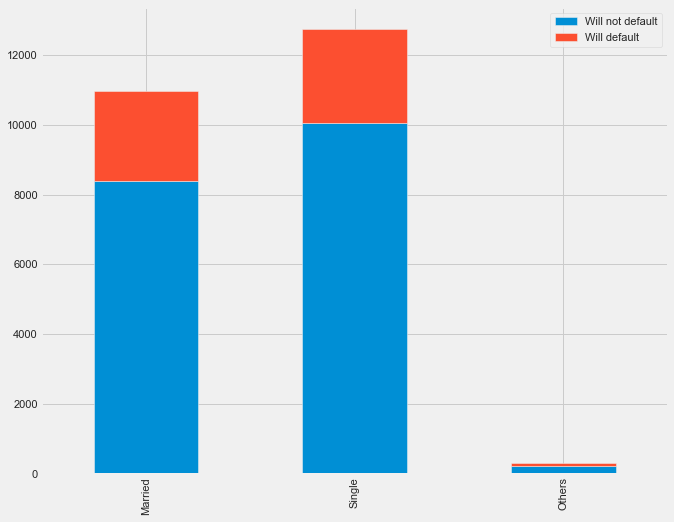

In [131]:
marriage_df.index = ['Married', 'Single', 'Others']
marriage_df.plot(kind='bar',stacked=True, figsize=(10,8))

It is 2.4 % more likely for a married person to default than a person who's married.

### Age

In [132]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = [30, 40, 50, 60, 70, 80]
df['age_binned'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,binned,age_binned
0,350000,1,1,2,37,-1,-1,-1,-1,-1,-1,316,316,316,466,466,316,316,316,466,466,316,316,0,400000,40
1,50000,2,2,1,37,2,2,2,-1,-1,-1,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,200000,40
2,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,200000,30
3,20000,1,3,1,56,-1,-1,-1,-1,2,-1,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,200000,60
4,110000,2,2,2,32,-1,-1,-1,-1,-1,-1,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,200000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,50000,2,1,2,24,-1,-1,-1,-1,-1,-1,12806,13490,0,0,0,0,7522,0,0,0,0,0,1,200000,30
23995,250000,1,3,1,44,-1,-1,-1,-1,-1,-1,6826,3900,4482,43546,38051,576,3924,4482,43676,38166,576,2389,1,400000,50
23996,50000,1,3,2,26,2,-1,-1,2,2,2,41827,42650,45930,44891,47654,48721,1800,4000,0,3500,2000,0,1,200000,30
23997,110000,2,2,1,38,-1,-1,-1,-1,-1,-1,195437,176420,63142,39854,9293,-1288,5000,10000,5048,2000,39958,52000,1,200000,40


In [133]:
age_df = df.groupby(['age_binned', 'default payment next month']).size().unstack(1)
age_df

default payment next month,0,1
age_binned,,
30,6827,1985
40,6791,1727
50,3681,1128
60,1222,415
70,162,48
80,8,5


In [134]:
age_df = df.groupby(['age_binned', 'default payment next month']).size().unstack(1)
age_df.reset_index(inplace = True)
age_df.columns = ['age_binned', 'Will not default', 'Will default']
age_df["percent"] = age_df["Will default"] / (age_df["Will not default"] + age_df["Will default"])

age_df

,age_binned,Will not default,Will default,percent
0,30,6827,1985,0.225
1,40,6791,1727,0.203
2,50,3681,1128,0.235
3,60,1222,415,0.254
4,70,162,48,0.229
5,80,8,5,0.385


In [135]:
del age_df['age_binned']
del age_df['percent']

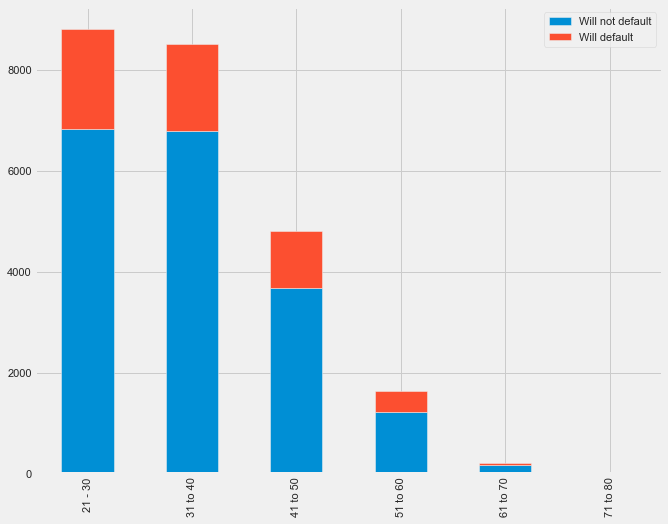

In [136]:
age_df.index = ['21 - 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80']
age_df.plot(kind='bar',stacked=True, figsize=(10,8))

30 to 40 year old clients are more likely to not default versus other age groups


### Summary of Observations

- Those with lower LIMIT_BAL values are more likely to default
- Males (sex = 1) are more likely to default versus females (sex = 2)
- Those with lower education (not University or Graduate)are more likely to default versus those with higher education
- Non-singles (Married) are more likely to default versus singles
- 30 to 40 year old clients are more likely to not default versus other age groups
- Those who pay duly are much more likely to not default versus those who have balances left

## 3. Feature Engineering

### Adding balance to be paid 

In [137]:
df['BALANCE'] = (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']) - (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) 

In [138]:
df['BALANCE'].describe()

count      23999.000
mean      240501.269
std       365991.343
min     -2671514.000
25%         4639.500
50%       103026.000
75%       309589.000
max      4116080.000
Name: BALANCE, dtype: float64

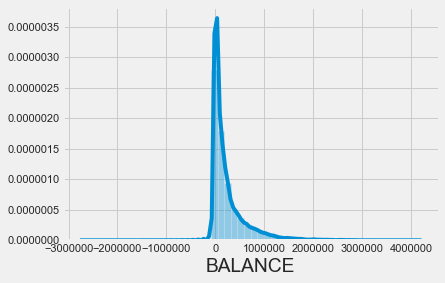

In [139]:
sns.distplot(df['BALANCE'])

### More detailed civil status

In [140]:
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 1 # Married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 2 # Single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 3 # Divorced/widowed man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 4 # Married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 5 # Single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 6 # Divorced woman

In [141]:
df['CIVIL_STATUS'].describe()

count   23999.000
mean        3.367
std         1.545
min         1.000
25%         2.000
50%         4.000
75%         5.000
max         6.000
Name: CIVIL_STATUS, dtype: float64

In [142]:
civil_df = df.groupby(['CIVIL_STATUS', 'default payment next month']).size().unstack(1)
civil_df.reset_index(inplace = True)
civil_df.columns = ['CIVIL_STATUS', 'Will not default', 'Will default']
civil_df["percent"] = civil_df["Will default"] / (civil_df["Will not default"] + civil_df["Will default"])

civil_df

,CIVIL_STATUS,Will not default,Will default,percent
0,1.000,3113,1074,0.257
1,2.000,4010,1190,0.229
2,3.000,92,34,0.270
3,4.000,5286,1485,0.219
4,5.000,6048,1487,0.197
5,6.000,142,38,0.211


In [143]:
del civil_df['CIVIL_STATUS']
del civil_df['percent']

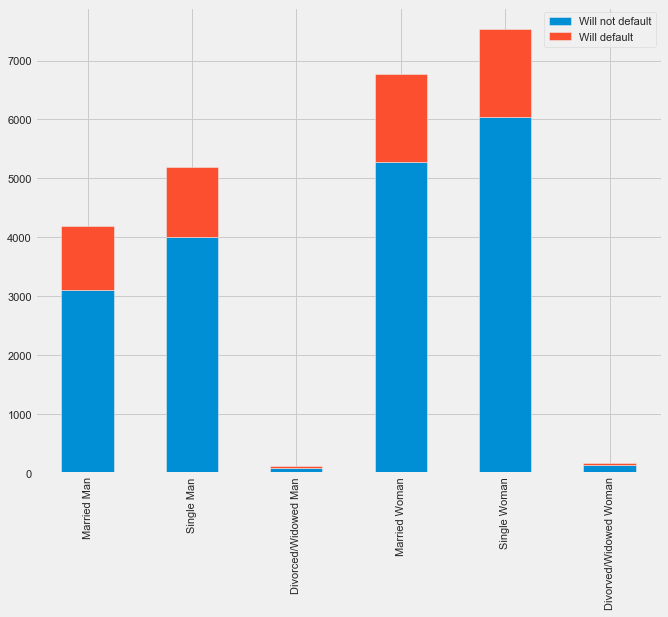

In [144]:
civil_df.index = ['Married Man', 'Single Man', 'Divorced/Widowed Man', 'Married Woman', 'Single Woman', 'Divorved/Widowed Woman']
civil_df.plot(kind='bar',stacked=True, figsize=(10,8))

This is better because we can distinguish than men in general are more likely to default than women in each category of civil status. Divorced/widowed men and married men are the two categories that have the highest percentage of default. While single women has the lowest.

## 4. Feature Selection

In [145]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'binned', 'age_binned', 'BALANCE',
       'CIVIL_STATUS'],
      dtype='object')

In [146]:
target = df['default payment next month']

In [147]:
features = df[['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BALANCE',
       'CIVIL_STATUS']]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### Logistic Regression

In [149]:
logreg = LogisticRegression().fit(X_train,y_train)

In [150]:
logreg.coef_

array([[-3.20081850e-06, -3.83474633e-03, -1.31571524e-02,
         2.73953270e-02,  2.17746526e-02,  1.89193644e-02,
         1.69401449e-02,  1.52768697e-02,  1.40630686e-02,
        -1.22002973e-05, -2.07500667e-06, -3.33943084e-06,
        -6.15372465e-06, -1.77492961e-06, -4.30295102e-06,
        -2.06544026e-05, -1.21167207e-05, -1.39882844e-06,
        -5.56231415e-06,  1.00087555e-06,  3.16812129e-06,
         5.71693012e-06, -1.32521240e-02]])

In [151]:
logreg.intercept_

array([-0.00217448])

In [152]:
logreg.score(X_test, y_test)

0.7777083333333333

In [153]:
odds = np.exp(logreg.intercept_[0])
odds

0.9978278872714959

In [154]:
probability = (odds / (1+ odds))
probability

0.4994563814174527

In [155]:
y_pred = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [156]:
metrics.accuracy_score(y_test, y_pred)

0.7777083333333333

**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [157]:
# examine the class distribution of the testing set (using a Pandas Series method)

y_test.value_counts()

0    3724
1    1076
Name: default payment next month, dtype: int64

In [158]:
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

0    4787
1      13
dtype: int64

In [159]:
# calculate the percentage of ones
y_test.mean()

0.22416666666666665

In [160]:
# calculate the percentage of zeros
1 - y_test.mean()

0.7758333333333334

In [161]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.7758333333333334

Comparing the **true** and **predicted** response values

In [162]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[3722    2]
 [1065   11]]


In [163]:
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

0    4787
1      13
dtype: int64

In [164]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Will Not Default', 'Will Default']

In [165]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3722    2]
 [1065   11]]


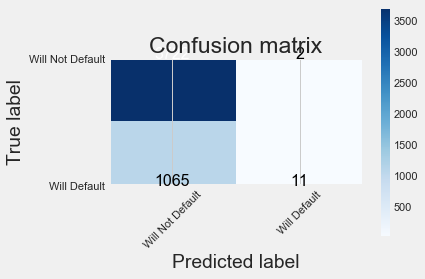

In [166]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [167]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [168]:
print((TP + TN) / float(TP + TN + FP + FN)) # same as metrics.accuracy_score

0.7777083333333333


#### Precision
When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?


$$\text{Precision} = \frac{TP}{TP+FP}$$

In [169]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.8461538461538461
0.8461538461538461


#### Recall (Sensitivity)

What proportion of actual positives was identified correctly?

$$\text{Recall} = \frac{TP}{TP+FN}$$

In [170]:
print(TP / float(TP + FN))

0.010223048327137546


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [171]:
print(TN / float(TN + FP))

0.9994629430719656


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [172]:
print(FP / float(TN + FP))

0.0005370569280343716


#### F1 score 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

$$F1-Score = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$$

In [173]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

0.020202020202020204

#### Adjusting classification threshold

In [174]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.778
recall,0.010
precision,0.846
F1,0.020


In [175]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.776
recall,0.000
precision,0.000
F1,0.000


In [176]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.84016132, 0.15983868],
       [0.67796669, 0.32203331],
       [0.6870127 , 0.3129873 ],
       [0.79907199, 0.20092801],
       [0.65372012, 0.34627988],
       [0.95035729, 0.04964271],
       [0.79444661, 0.20555339],
       [0.97770947, 0.02229053],
       [0.74180003, 0.25819997],
       [0.82504784, 0.17495216]])

In [177]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.15983868, 0.32203331, 0.3129873 , 0.20092801, 0.34627988,
       0.04964271, 0.20555339, 0.02229053, 0.25819997, 0.17495216])

In [178]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

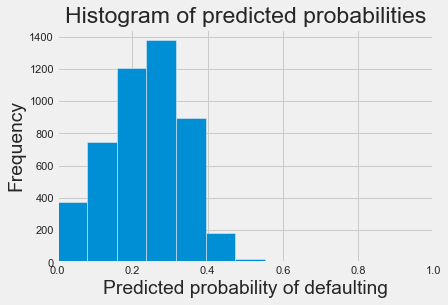

In [179]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of defaulting')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting default in order to **increase the sensitivity** of the classifier

In [180]:
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [181]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[3722    2]
 [1065   11]]


In [182]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[2911  813]
 [ 548  528]]


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

#### ROC Curves and Area Under the Curve (AUC)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

**True Positive Rate (TPR)** is a synonym for recall and is therefore defined as follows:

$$TPR = \frac{TP} {TP + FN}$$

**False Positive Rate (FPR)** is defined as follows:


$$FPR = \frac{FP} {FP + TN}$$


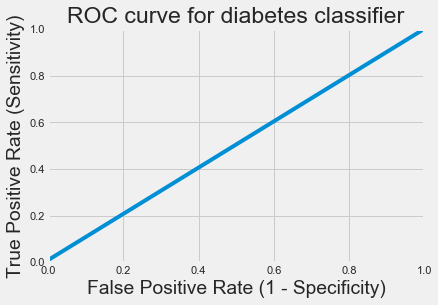

In [183]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [184]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6854653228929999


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [185]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, features, target, cv=10, scoring='roc_auc').mean()

0.6503242309217642

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

- AUC is **scale-invariant**. It measures how well predictions are ranked, rather than their absolute values.
- AUC is **classification-threshold-invariant**. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

**Two Caveats**

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

**Problems created by class imbalance**
The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.


### KNN

In [186]:
knn = KNeighborsClassifier(n_neighbors=1)
# the n_neighbors is the parameter where you specify k

In [187]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [188]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [189]:
f1_score(y_test, y_predict, average='weighted')

0.7199518618080447

In [190]:
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
print(classification_report(y_test, y_predict))

[[3047  677]
 [ 669  407]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3724
           1       0.38      0.38      0.38      1076

    accuracy                           0.72      4800
   macro avg       0.60      0.60      0.60      4800
weighted avg       0.72      0.72      0.72      4800



In [191]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7199518618080447, 0.7429219485180749, 0.760483331580723, 0.7625327521940423, 0.7745519784518881, 0.772824094933321, 0.7824601047146461, 0.7760134895467667, 0.7815220129317593, 0.7787960910915278]


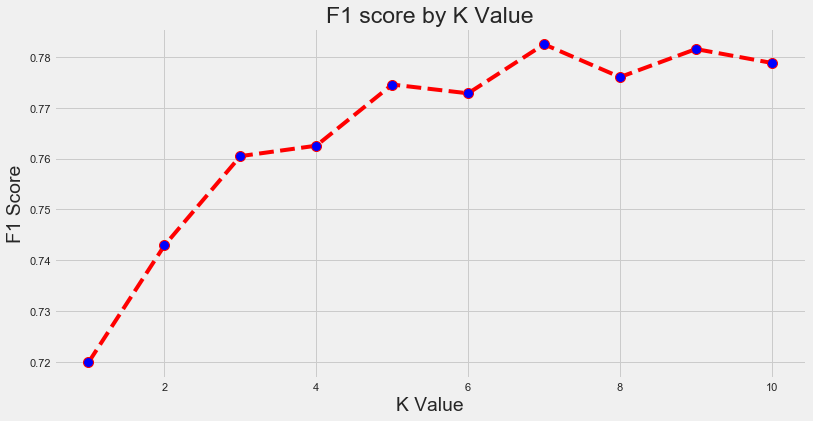

In [192]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### Decision Tree (Classification)

In [193]:
ctree=DecisionTreeClassifier(max_depth = 5)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

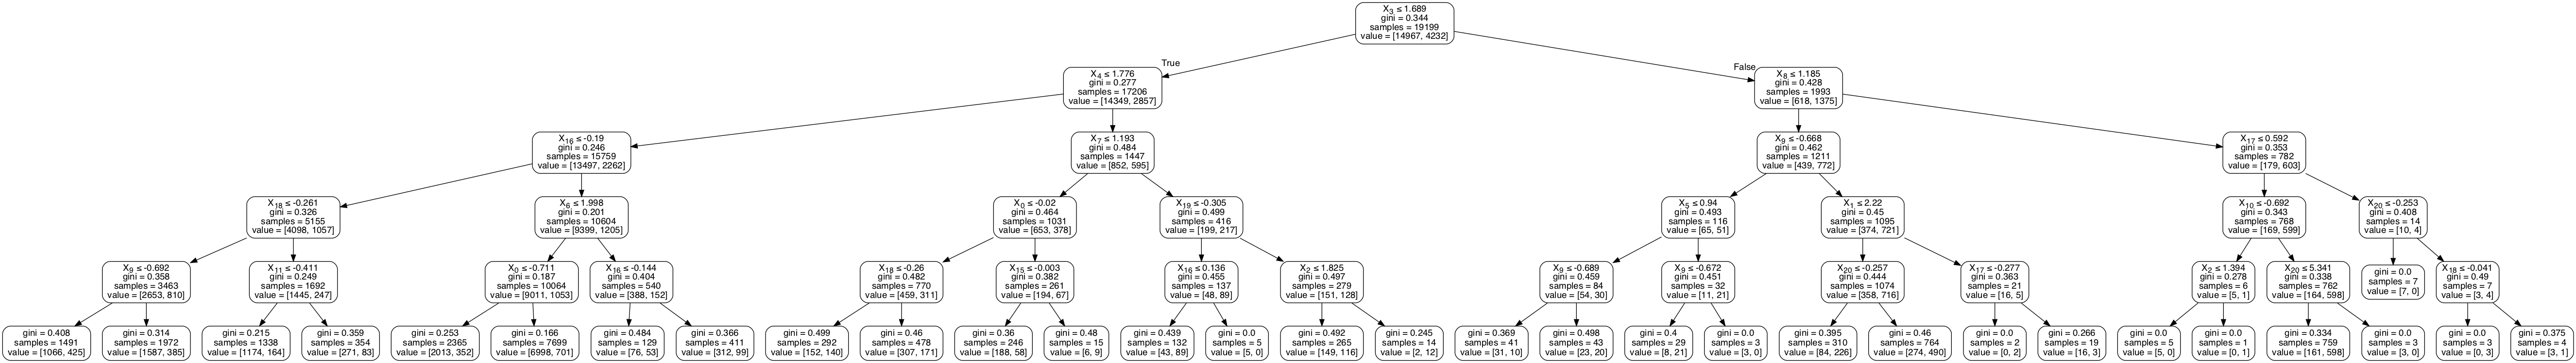

In [194]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [195]:
clasPred = ctree.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clasPred)

0.823125

The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. 

[0.8196594700218988, 0.819701188764674, 0.8205347999337038, 0.8209097999771064, 0.8208264666437731, 0.8192844872889735, 0.8177428032684265, 0.8130339140756216, 0.8134512405080278]


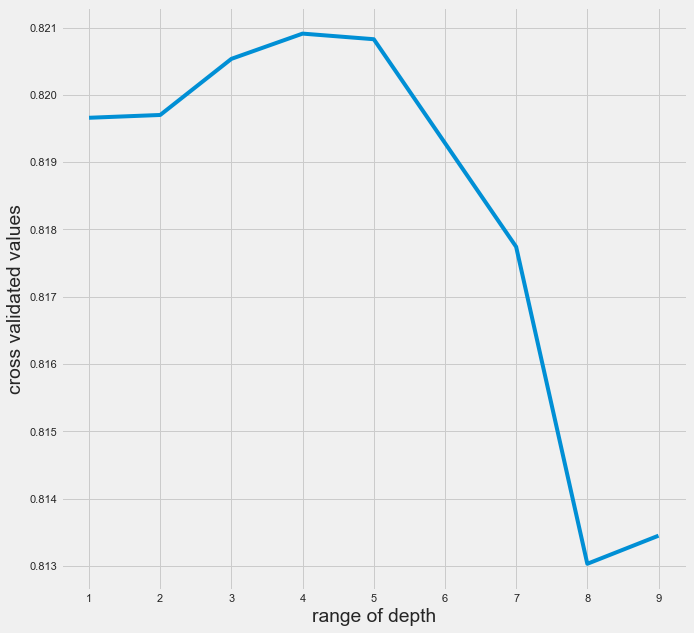

In [197]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, features, target, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, features, target, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

#### Validation Curve

In [198]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(target.shape)
print(features.shape)

(19199, 23)
(4800, 23)
(19199,)
(4800,)
(23999,)
(23999, 23)


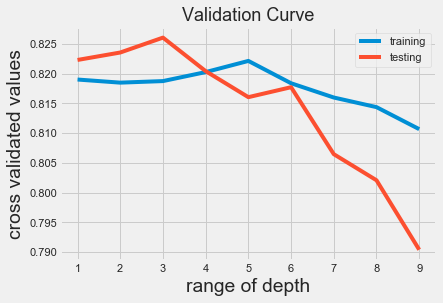

In [199]:
depth_range = range(1,10)
val = []
val2 = []

for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    training_score = cross_val_score(ctree, X_train, y_train, cv = 10)
    test_score = cross_val_score(ctree, X_test, y_test, cv = 10)
    val.append(training_score.mean())
    val2.append(test_score.mean())
    
fig, ax = plt.subplots()

ax.plot(depth_range, val, label="training")
ax.plot(depth_range, val2, label="testing")

plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.title("Validation Curve", fontsize=18);

ax.legend()
plt.show()

In [200]:
d

NameError: name 'd' is not defined

In [ ]:
val2

### Decision Tree (if Regression)

In [201]:
from sklearn.tree import DecisionTreeRegressor


In [202]:
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=5)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

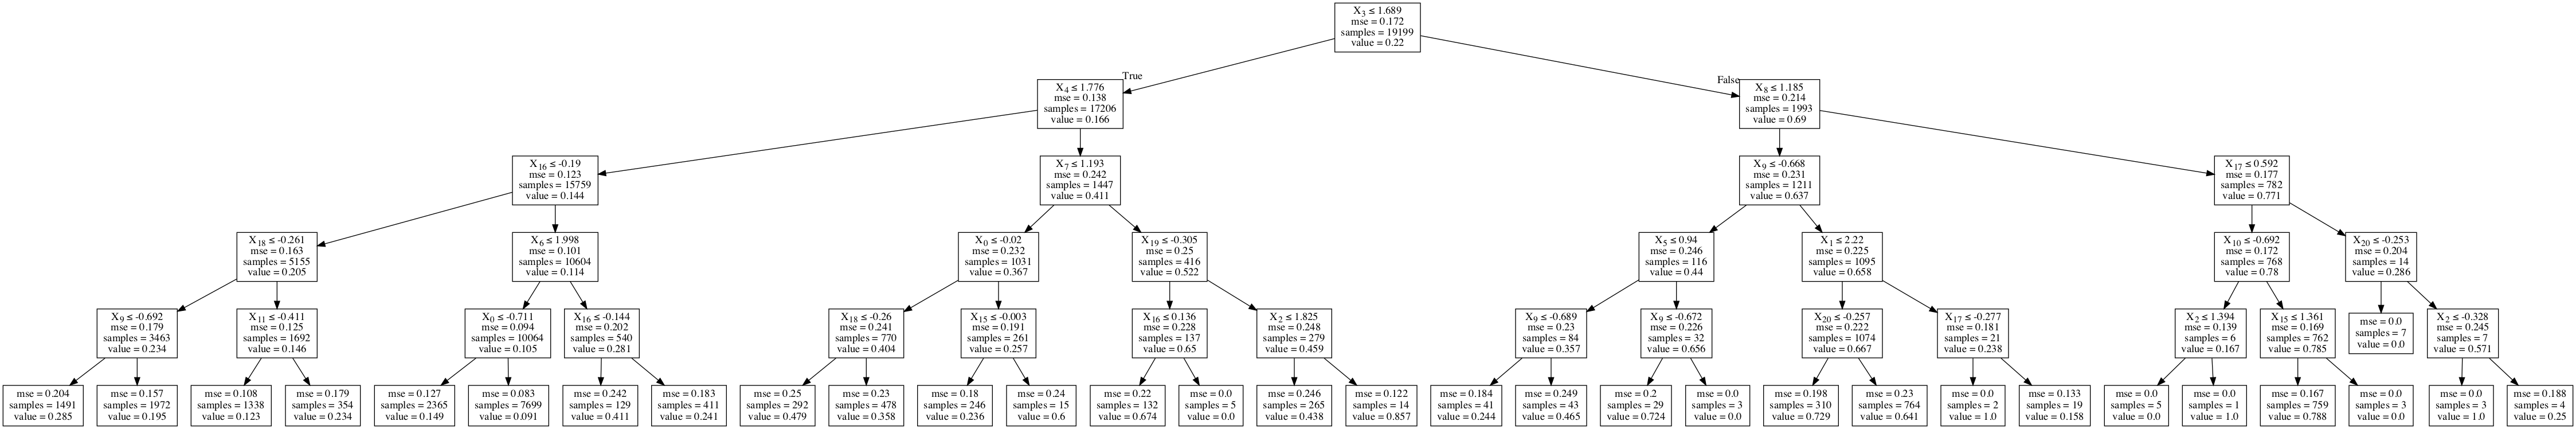

In [203]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [230]:
# use the model to predict the testing and compare mse
regPred = regTree.predict(X_test)


In [231]:
# comparing the results and plot them 
mse = mean_squared_error(regPred, y_test)
mse

0.13927254371547698

#### Random Forest

Baseline

In [247]:
# check to see if random forest can beat this performance 
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [207]:
# fit the random forest parameter 
rf.fit(features, target)
base_prediction = rf.predict(features)

In [208]:
#evaluate the target MSE
sum((base_prediction - target)**2) / len(target)

0.027815916712681826

In [209]:
# Number of trees in random forest
n_estimators = [10,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','auto']
# Maximum number of levels in tree
max_depth =[2,5,10]
max_depth.append(None)
# Minimum number of samples required to split a node
None
# Minimum number of samples required at each leaf node
None
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 10, None],
 'max_features': ['auto', 'sqrt', 'log2', 'auto'],
 'n_estimators': [10, 200]}


In [210]:
# Create a based model
rf = RandomForestRegressor(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3)
grid_search.fit(features, target)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
     

In [211]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10}

In [212]:
rf_grid = RandomForestRegressor(random_state = 42, bootstrap = True, max_depth = 2, max_features = 'auto', n_estimators = 10)
rf_grid.fit(features, target)
grid_prediction = rf_grid.predict(features)

In [213]:
#evaluate the performance of 
sum((grid_prediction - target)**2) / len(target)

0.14061352806111987

# XGBoost

In [222]:
import xgboost as xgb

In [224]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve


In [226]:
xgb = XGBClassifier(n_jobs = -1)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [227]:
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 82.312%


In [234]:
best_XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [235]:
best_XGB.fit(X_train, y_train)
prediction = best_XGB.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 82.167%


In [236]:
eval_set = [(X_train, y_train), (X_test, y_test)]

best_XGB.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

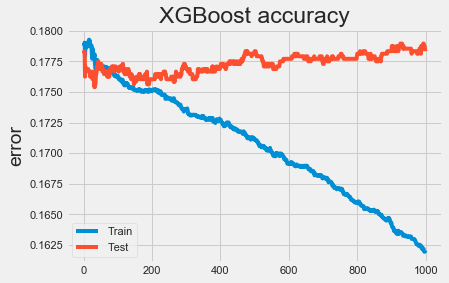

In [237]:
# retrieve performance metrics
results = best_XGB.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('error')
plt.title('XGBoost accuracy')
plt.show()

## 6. Model Evaluation

## 7. Final Model